Problem 1. 

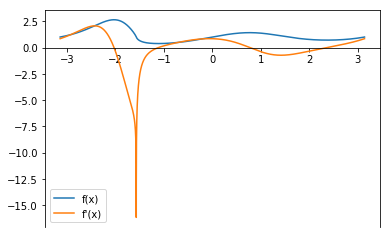

In [10]:
import pandas as pd
import sympy as sp 
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import ticker 
import time
from autograd import numpy as anp 
from autograd import grad
import warnings

# f(x) function
def f(x):
    return (np.sin(x)+1)**(np.sin(np.cos(x)))
# f'(x) function
def fprime(X): 
    def inner():
        f = (sp.sin(sp.symbols('x'))+1) ** (sp.sin(sp.cos(sp.symbols('x')))) 
        fprime = sp.diff(f, sp.symbols('x'))
        return sp.lambdify(sp.symbols('x'), fprime)
    return inner()(X)

# Plot f and its derivative f' over the domain [-pi, pi]
x = np.linspace(-np.pi,np.pi,10000)
ax1 = plt.gca() 
ax1.spines['bottom'].set_position("zero") 
ax1.plot(x,f(x),label='f(x)') 
ax1.plot(x,fprime(x),label='f\'(x)') 
ax1.legend()

Problem 2.

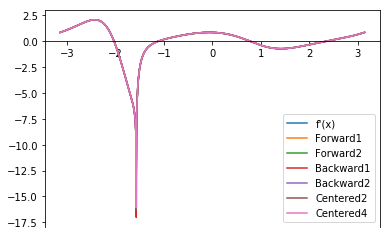

In [2]:
# Derivative Approximations usings different finite quotients.
def forward1(x,h=1e-4): 
    return (f(x+h)-f(x))/h
def forward2(x,h=1e-4):
    return (4*f(x+h)-3*f(x)-f(x+2*h))/(2*h)
def backward1(x,h=1e-4): 
    return (f(x)-f(x-h))/h
def backward2(x,h=1e-4):
    return (3*f(x)-4*f(x-h)+f(x-2*h))/(2*h)
def centered2(x,h=1e-4):
    return (f(x+h)-f(x-h))/(2*h)
def centered4(x,h=1e-4):
    return (f(x-2*h)-8*f(x-h)+8*f(x+h)-f(x+2*h))/(12*h)
ax2 = plt.gca() 
ax2.spines['bottom'].set_position("zero") 
# Plot f'(x) from Problem 1.
ax2.plot(x,fprime(x),label='f\'(x)')
# Plot six f'(x) approximations. 
ax2.plot(x,forward1(x),label='Forward1') 
ax2.plot(x,forward2(x),label='Forward2') 
ax2.plot(x,backward1(x),label='Backward1') 
ax2.plot(x,backward2(x),label='Backward2') 
ax2.plot(x,centered2(x),label='Centered2') 
ax2.plot(x,centered4(x),label='Centered4') 
ax2.legend()

The six finite different quotients for approximating f'(x) and f'(x) converge to one line in the graph.

Problem 3.

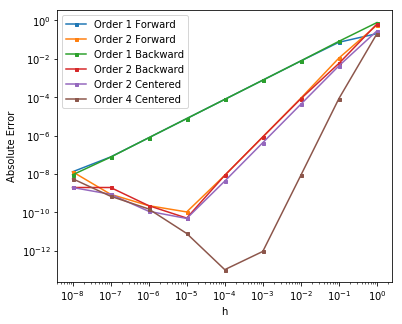

In [9]:
h = np.logspace(-8,0,9)
ax3 = plt.figure(figsize=(6,5)).gca()
ax3.loglog(h,np.abs(forward1(1,h) - fprime(1)),label = 'Order 1 Forward',marker = 's',ms=3)
ax3.loglog(h,np.abs(forward2(1,h) - fprime(1)),label = 'Order 2 Forward',marker = 's',ms=3)
ax3.loglog(h,np.abs(backward1(1,h) - fprime(1)),label = 'Order 1 Backward',marker = 's',ms=3)
ax3.loglog(h,np.abs(backward2(1,h) - fprime(1)),label = 'Order 2 Backward',marker = 's',ms=3)
ax3.loglog(h,np.abs(centered2(1,h) - fprime(1)),label = 'Order 2 Centered',marker = 's',ms=3)
ax3.loglog(h,np.abs(centered4(1,h) - fprime(1)),label = 'Order 4 Centered',marker = 's',ms=3)
plt.xlabel("h")
plt.ylabel("Absolute Error")
ax3.legend()

Problem 4.

In [11]:
warnings.filterwarnings("ignore")
df = np.load("plane.npy") 
radar = pd.DataFrame(df,columns=['t','alpha','beta'])

# Convert alpha and beta to radians
radar['alpha'] = np.deg2rad(radar['alpha'])
radar['beta'] = np.deg2rad(radar['beta'])
a=500
# Compute the coordinates x(t) and y(t) at each t.
radar['x(t)'] = (a * np.tan(radar['beta'])) / (np.tan(radar['beta']) - np.tan(radar['alpha']))
radar['y(t)'] = (a * np.tan(radar['beta']) * np.tan(radar['alpha'])) / (np.tan(radar['beta']) - np.tan(radar['alpha']))
# Approximate x'(t) and y'(t) using forward difference quotient for
# t = 7, a backward difference quotient for t = 14, and a centered difference
# quotient for t = 8-13.
radar['xprime(t)'] = 0
radar['yprime(t)'] = 0
radar['xprime(t)'][0] = radar['x(t)'][1] - radar['x(t)'][0]
radar['yprime(t)'][0] = radar['y(t)'][1] - radar['y(t)'][0] 
for i in range(1,7):
    radar['xprime(t)'][i] = 0.5 * (radar['x(t)'][i + 1] - radar['x(t)'][i - 1])
    radar['yprime(t)'][i] = 0.5 * (radar['y(t)'][i + 1] - radar['y(t)'][i - 1])
radar['xprime(t)'][7] = radar['x(t)'][7] - radar['x(t)'][6]
radar['yprime(t)'][7] = radar['y(t)'][7] - radar['y(t)'][6]
radar['speed'] = np.sqrt(radar['xprime(t)'] ** 2 + radar['yprime(t)'] ** 2)
radar[['t','speed']]

,t,speed
0,7.0,45.607017
1,8.0,46.572524
2,9.0,48.507731
3,10.0,49.729267
4,11.0,47.539457
5,12.0,50.695167
6,13.0,52.886671
7,14.0,50.960769


Problem 5

In [5]:
def Jacobian(f,t,h): 
    n = len(f)
    m = len(t) 
    I = np.identity(m)
    J = sp.zeros(n,m)
    # Approximate using second order centered difference quotient
    for i,func in enumerate(f):
        for j,var in enumerate(t):
            f = sp.lambdify((x,y), func, 'numpy')
            # f(x0+he_j)
            right = t + h * I[:, j]
            # f(x0-h_ej)
            left = t - h * I[:, j]
            # Equation 8.5 for centered difference quotient.
            J[i,j] = (f(right[0], right[1]) - f(left[0], left[1])) / (2 * h)
    return J


In [6]:
# Test the function.
x = sp.Symbol('x')
y = sp.Symbol('y')
func = [x ** 2, x ** 3 - y]
t = [1,1]
h = 1e-5
Jacobian(func,t,h)

Matrix([
[  2.000000000002,             0.0],
[3.00000000009737, -1.000000000001]])

Problem 7.

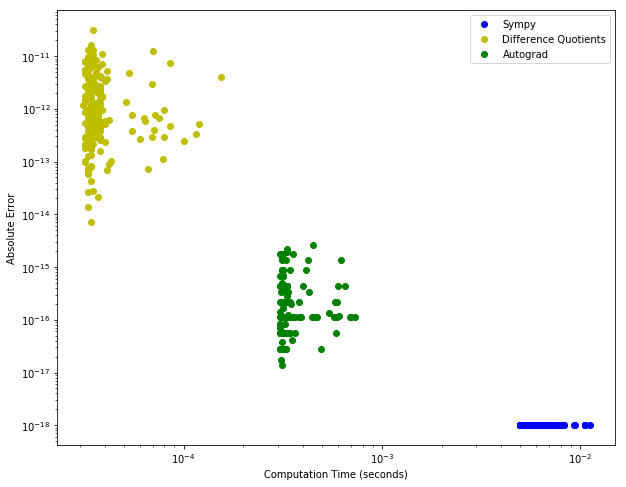

In [12]:
def Timer(N): 
    Time1 = np.zeros(N,dtype = 'float')
    Time2 = np.zeros(N,dtype = 'float')
    Time3 = np.zeros(N,dtype = 'float')
    Error1 = 1e-18*np.ones(N,dtype = 'float')
    Error2 = np.zeros(N,dtype = 'float')
    Error3 = np.zeros(N,dtype = 'float')
    g = lambda x: (anp.sin(x) + 1) ** (anp.sin(anp.cos(x))) 
    dg = grad(g)
    for i in range(N):
        # Choose a random value x0
        x = np.random.uniform(low = -np.pi, high = np.pi)
        # Calculate exact value of f'(x0) and time the process.
        time11 = time.clock()
        result1 = fprime(x)
        time12 = time.clock()
        Time1[i] = time12 - time11
        # Time the process of getting an f'(x0) approximation using the 
        # fourth-order centered difference quotients from Problem 3.
        time21 = time.clock()
        result2 = centered4(x)
        time22 = time.clock()
        Time2[i] = time22-time21
        # Record the Abosolute Error
        Error2[i] = abs(result2-result1)
        # Time the process if getting an approximation using autograd.
        time31 = time.clock()
        result3 = dg(x)
        time32 = time.clock()
        Time3[i] = time32 - time31
        # Record the absolute error.
        Error3[i] = abs(result3-result1)
    return Time1, Time2, Time3, Error1, Error2, Error3 
# Test the function for N = 200
warnings.filterwarnings("ignore")
Time1,Time2,Time3,Error1,Error2,Error3 = Timer(200)
ax5 = plt.figure(figsize = (10,8)).gca() 
ax5.loglog(Time1,Error1, 'ro',label = 'Sympy',color = 'b') 
ax5.loglog(Time2,Error2, 'ro',label = 'Difference Quotients',color = 'y') 
ax5.loglog(Time3,Error3, 'ro',label = 'Autograd',color = 'g') 
plt.xlabel("Computation Time (seconds)")
plt.ylabel("Absolute Error")
ax5.legend()